In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 0. 데이터셋 준비

파이썬에서 `copy()` 메서드를 사용하지 않으면 주소값을 복사해서 사용기 때문에 원본 값을 변경 시키게 된다.

따라서 원본 항목을 유지하면서 데이터를 보정하려면 `copy()` 메서드를 사용해야 한다.

In [ ]:
# 전처리에 사용되는 데이터셋
df1 = pd.read_csv('/content/drive/MyDrive/KT AICE/files/cust_data.csv')

# 시각화에 사용되는 데이터셋
df3 = df1[:300]

In [ ]:
# 결측치 처리에 사용되는 데이터셋

df2 = pd.read_csv("/content/drive/MyDrive/KT AICE/files/sc_cust_info_txn_v1.5.csv")
df2 = df2[["cust_class","sex_type","age","efct_svc_count","dt_stop_yn","npay_yn","r3m_avg_bill_amt","r3m_A_avg_arpu_amt","r3m_B_avg_arpu_amt", "termination_yn"]]
df2 = df2.rename(
    columns = {
        "cust_class" : 'class',
        "sex_type":'sex',
        "efct_svc_count":'service',
        "dt_stop_yn":'stop',
        "npay_yn":'npay',
        "r3m_avg_bill_amt":'avg_bill',
        "r3m_A_avg_arpu_amt":"A_bill",
        "r3m_B_avg_arpu_amt":'B_bill',
        "termination_yn":'termination'
    }
)

df2.replace('_', np.nan, inplace=True)
df2['age'] = df2['age'].astype(float)

In [ ]:
# 머신러닝에 사용되는 데이터셋

tips = sns.load_dataset('tips')

tips.sex.replace(['Female', 'Male'], [0,1], inplace=True)
tips.smoker.replace(['No', 'Yes'], [0,1], inplace=True)
tips.time.replace(['Dinner', 'Lunch'], [1,0], inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tips.day = le.fit_transform(tips.day)

tips.to_csv('/content/drive/MyDrive/KT AICE/files/tips2.csv', index=False)

tips2 = pd.read_csv('/content/drive/MyDrive/KT AICE/files/tips2.csv')

In [ ]:
df1_fix = df1.copy()
df2_fix = df2.copy()
df3_fix = df3.copy()
tips2_fix = tips2.copy()

In [ ]:
df1.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


In [ ]:
df2.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,NaN,NaN,NaN,1,N,N,300.0000,90.00000,180.0000,Y
2,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
3,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
4,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N


In [ ]:
tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,1,2
1,10.34,1.66,1,0,2,1,3
2,21.01,3.50,1,0,2,1,3
3,23.68,3.31,1,0,2,1,2
4,24.59,3.61,0,0,2,1,4


## 1. 자료형

### (1) List

In [ ]:
# 1 ~ 9까지 숫자를 쉽게 리스트 변수로 만들기
L1 = list(range(1, 10))
L2 = list(range(1, 10, 2))

print(L1)
print(L2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7, 9]


In [ ]:
# 리스트 함수

## 마지막에 값 추가
L1.append(10)
print(L1)

## 특정 인덱스에 값 추가
L1.insert(1, 3)
print(L1)

## 리스트 2개 연결
L1.extend(L2)
print(L1)

## 특정 인덱스의 값 삭제
L1.remove(3)
print(L1)

del L1[1]
print(L1)

## 특정 인덱스의 값을 반환 후 삭제
print(L1.pop(8))

## 특정 값의 개수 카운트
print(L1.count(3))

## 오름차순 정렬
L1.sort()
print(L1)

## 오름차순 정렬
L1.sort(reverse=True)
print(L1)

## 리스트에 해당 값 있는지 확인
print(5 in L1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 3, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 3, 5, 7, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 3, 5, 7, 9]
[1, 3, 4, 5, 6, 7, 8, 9, 10, 1, 3, 5, 7, 9]
10
2
[1, 1, 3, 3, 4, 5, 5, 6, 7, 7, 8, 9, 9]
[9, 9, 8, 7, 7, 6, 5, 5, 4, 3, 3, 1, 1]
True


In [ ]:
# 리스트의 길이 출력
print(len(L1))

# 리스트의 최소값 출력
print(min(L1))

# 리스트의 최대값 출력
print(max(L1))

# 리스트 내의 값들의 합 출력
print(sum(L1))

13
1
9
68


### (2) Tuple

리스트와 달리 요소들의 수정과 추가가 불가능 (딕셔너리의 key로 사용할 수 있음)

In [ ]:
T = ('banana', 'apple', 'kiwi')

# 값 수정 불가능 -> 에러 발생
T[1] = 'watermelon'

### (3) Dictionary

리스트는 100번째 위치에 접근할 경우, 처음부터 하나씩 찾아가므로 인덱싱이 느림

딕셔너리는 key값만 알고 있으면 해당 value를 거의 바로 찾을 수 있음

In [ ]:
# 딕셔너리 정의하는 2가지 방법
D1 = {'name': '홍길동', 'age': 30, 'email': 'hgd@kor.com'}

D2 = dict()
D2['메로나'] = [300, 20]

print(D1)
print(D2)

print(D1['name'])
print(D2['메로나'])
print(D2['메로나'][0])

In [ ]:
# 딕셔너리 함수

## 모든 key 반환
print(D1.keys())

## 모든 value 반환
print(D1.values())

## 모든 key-value 쌍 반환
print(D1.items())

## 특정 key에 해당하는 value 값 반환
print(D1.get('name'))
print(D1.get('year'))

## 특정 key 삭제
del D1['email']

## 딕셔너리에 특정 key가 있는지 확인
print('email' in D1)

## 딕셔너리 초기화
D1.clear()
print(D1)

In [ ]:
# 딕셔너리의 key, vale들을 for문을 이용해 출력

for value in D1.keys():
  print(value)

for value in D1.values():
  print(value)

## 2-1. Pandas

In [ ]:
df1.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


### (1) 데이터 확인

In [ ]:
print(df1.columns)
print(df1.index)
print(df1.values)

Index(['class', 'sex', 'age', 'service', 'stop', 'npay', 'avg_bill', 'A_bill',
       'B_bill', 'termination'],
      dtype='object')
RangeIndex(start=0, stop=8228, step=1)
[['C' 'F' 28.0 ... 792.0 1584.0 'Y']
 ['E' 'F' 24.0 ... 2526.0 6983.0 'N']
 ['F' 'F' 32.0 ... 2331.71001 6750.4666 'N']
 ...
 ['G' 'M' 12.0 ... 2069.94999 10605.9266 'N']
 ['C' 'F' 40.0 ... 942.0 1884.0 'Y']
 ['C' 'F' 59.0 ... 365.535 1839.9 'N']]


### (2) 데이터 요약

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        8228 non-null   object 
 1   sex          8228 non-null   object 
 2   age          8228 non-null   float64
 3   service      8228 non-null   int64  
 4   stop         8228 non-null   object 
 5   npay         8228 non-null   object 
 6   avg_bill     8228 non-null   float64
 7   A_bill       8228 non-null   float64
 8   B_bill       8228 non-null   float64
 9   termination  8228 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 642.9+ KB


In [ ]:
df1.describe()

,age,service,avg_bill,A_bill,B_bill
count,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000
mean,47.879801,1.226544,10356.605452,1764.512253,5630.461347
std,19.255090,0.800793,8394.568408,2599.854946,4380.126308
min,4.000000,0.000000,299.900100,0.000000,0.000000
25%,32.000000,1.000000,4725.601635,386.149950,2385.362475
50%,49.000000,1.000000,9396.623330,1665.000000,5404.765400
75%,61.000000,1.000000,14322.583350,2325.562500,8434.983300
max,104.000000,14.000000,144739.686600,131581.533300,65836.558700


### (3) 데이터 탐색

In [ ]:
print(df1.loc[4, 'class'])
print(df1.loc[3, ['class', 'sex']])

C
class    D
sex      M
Name: 3, dtype: object


In [ ]:
print(df1.iloc[4, 3])

1


In [ ]:
df1.select_dtypes(['int64', 'float64']).columns

Index(['age', 'service', 'avg_bill', 'A_bill', 'B_bill'], dtype='object')

### (4) 데이터 조작

In [ ]:
df_ = df1.set_index('class')
df_.head()

,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
class,,,,,,,,,
C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
C,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


In [ ]:
df_.reset_index().head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


In [ ]:
df_.reset_index(drop=True).head()

,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
3,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
4,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


## 2-2. Pandas (DataFrame 병합)

### (1) concat

위,아래 또는 옆으로 단순히 이어붙임

In [ ]:
df_a = pd.DataFrame({'id': [1, 2], 'score': [90, 80]})
df_b = pd.DataFrame({'id': [3, 4], 'score': [85, 95]})

In [ ]:
# 세로 방향 병합 (default)
pd.concat([df_a, df_b], axis=0)

,id,score
0,1,90
1,2,80
0,3,85
1,4,95


In [ ]:
# 인덱스 초기화
pd.concat([df_a, df_b], axis=0, ignore_index=True)

,id,score
0,1,90
1,2,80
2,3,85
3,4,95


In [ ]:
# 가로 방향 병합
pd.concat([df_a, df_b], axis=1)

,id,score,id,score
0,1,90,3,85
1,2,80,4,95


### (2) merge

공통된 column을 기준으로 합침

In [ ]:
# 'id' column이 공통임
df_a = pd.DataFrame({'id': [1, 2, 3], 'score': [90, 80, 85]})
df_b = pd.DataFrame({'id': [2, 3, 4], 'grade': ['A', 'B', 'C']})

In [ ]:
# 공통된 'id' column만 표시됨
pd.merge(df_a, df_b, on='id', how='inner')

,id,score,grade
0,2,80,A
1,3,85,B


In [ ]:
# 왼쪽 df의 'id' column이 다 표시됨
pd.merge(df_a, df_b, on='id', how='left')

,id,score,grade
0,1,90,NaN
1,2,80,A
2,3,85,B


In [ ]:
# 오른쪽 df의 'id' column이 다 표시됨
pd.merge(df_a, df_b, on='id', how='right')

,id,score,grade
0,2,80.0,A
1,3,85.0,B
2,4,NaN,C


In [ ]:
# 모든 df의 'id' column이 다 표시됨
pd.merge(df_a, df_b, on='id', how='outer')

,id,score,grade
0,1,90.0,NaN
1,2,80.0,A
2,3,85.0,B
3,4,NaN,C


## 2-3. Pandas (DataFrame 재구조화)

### (1) Groupby

같은 값을 묶어서 통계 결과를 출력

In [ ]:
df1 = df1_fix.copy()

gender_group = df1.groupby('sex')

print(gender_group.groups)

gender_group.count()

{'F': [0, 1, 2, 4, 6, 8, 10, 11, 13, 14, 16, 17, 20, 21, 32, 33, 35, 38, 39, 41, 43, 44, 47, 53, 55, 57, 59, 61, 63, 64, 65, 67, 68, 72, 73, 74, 75, 81, 84, 88, 89, 92, 94, 95, 96, 101, 103, 104, 107, 108, 109, 110, 111, 114, 118, 119, 120, 121, 123, 124, 125, 126, 130, 131, 132, 133, 135, 139, 140, 142, 143, 147, 149, 155, 156, 158, 160, 161, 169, 170, 172, 174, 176, 178, 179, 181, 183, 187, 190, 193, 194, 198, 199, 203, 205, 206, 209, 210, 217, 218, ...], 'M': [3, 5, 7, 9, 12, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 40, 42, 45, 46, 48, 49, 50, 51, 52, 54, 56, 58, 60, 62, 66, 69, 70, 71, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 90, 91, 93, 97, 98, 99, 100, 102, 105, 106, 112, 113, 115, 116, 117, 122, 127, 128, 129, 134, 136, 137, 138, 141, 144, 145, 146, 148, 150, 151, 152, 153, 154, 157, 159, 162, 163, 164, 165, 166, 167, 168, 171, 173, 175, 177, 180, 182, 184, 185, 186, ...]}


,class,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
sex,,,,,,,,,
F,3796,3796,3796,3796,3796,3796,3796,3796,3796
M,4432,4432,4432,4432,4432,4432,4432,4432,4432


In [ ]:
multi_group = df1.groupby(['class', 'sex'])

multi_group.count()

age  service  stop  npay  avg_bill  A_bill  B_bill  termination
class sex                                                                  
C     F     849      849   849   849       849     849     849          849
      M    1064     1064  1064  1064      1064    1064    1064         1064
D     F    1097     1097  1097  1097      1097    1097    1097         1097
      M    1084     1084  1084  1084      1084    1084    1084         1084
E     F     638      638   638   638       638     638     638          638
      M     606      606   606   606       606     606     606          606
F     F     320      320   320   320       320     320     320          320
      M     391      391   391   391       391     391     391          391
G     F     839      839   839   839       839     839     839          839
      M    1199     1199  1199  1199      1199    1199    1199         1199
H     F      53       53    53    53        53      53      53           53
      M      88       88    88    88        88      88      88           88

In [ ]:
# 여러 기준에 대해서 집계하는 방법
multi_group.aggregate(['min', 'max'])

age        service     stop     npay       avg_bill               \
            min    max     min max  min max  min max        min          max   
class sex                                                                      
C     F     7.0  104.0       0   3    N   Y    N   Y   300.0000   68150.1667   
      M     7.0  101.0       0   5    N   Y    N   Y   299.9001   23069.1667   
D     F     6.0   91.0       0   6    N   Y    N   Y   300.0000   54076.5000   
      M     4.0   91.0       0   5    N   Y    N   Y   300.0000  144739.6866   
E     F    12.0   85.0       0   6    N   Y    N   Y  1350.0000   52263.0667   
      M    14.0   92.0       0   7    N   Y    N   Y  1371.0000  105562.5333   
F     F    18.0   90.0       0   9    N   Y    N   Y  5337.0666   59935.2667   
      M    14.0   87.0       0  11    N   Y    N   Y  3657.2800   73000.3667   
G     F     6.0   81.0       0   6    N   Y    N   Y   300.0000   79795.6333   
      M     7.0   96.0       0  14    N   Y    N   Y  1350.0000  112900.4667   
H     F    19.0   80.0       1   6    N   Y    N   Y  4836.2000   74719.9667   
      M    11.0   78.0       1   9    N   Y    N   Y  8289.8000   96136.1000   

          A_bill                   B_bill              termination      
             min           max        min          max         min max  
class sex                                                               
C     F      0.0   48101.62160     0.0000  14434.01600           N   Y  
      M      0.0   14774.73360     0.0000  13909.40000           N   Y  
D     F      0.0   16653.66670     0.0000  14382.00000           N   Y  
      M      0.0  131581.53330     0.0000  19255.69998           N   Y  
E     F      0.0   16373.33340     0.0000  17532.89170           N   Y  
      M      0.0   37972.79980     0.0000  43474.32550           N   Y  
F     F      0.0   12112.29920     0.0000  28224.29170           N   Y  
      M      0.0   15891.53340     0.0000  36054.46670           N   Y  
G     F      0.0   55002.40000     0.0000  57101.53330           N   Y  
      M      0.0   47599.45010     0.0000  65836.55870           N   Y  
H     F      0.0   11207.99501  2099.3001  18265.69760           N   N  
      M      0.0   14420.41500   209.3001  30360.68330           N   N

In [ ]:
# loc 및 iloc 사용하는 방법
multi_group.max().loc['C', 'M']

,C
,M
age,101.0
service,5
stop,Y
npay,Y
avg_bill,23069.1667
A_bill,14774.7336
B_bill,13909.4
termination,Y


### (2) Pivot Table

In [ ]:
sample = pd.DataFrame(
    {
        '고객ID': ['cust_1', 'cust_1', 'cust_1', 'cust_2', 'cust_2', 'cust_2', 'cust_3', 'cust_3', 'cust_3'],
        '상품코드': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
        '등급' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
        '구매금액': [30, 10, 0, 40, 15, 30, 0, 0, 10],
        '나이': [15, 40, 33, 29, 6, 30, 54, 69, 38],
    }
)

sample

,고객ID,상품코드,등급,구매금액,나이
0,cust_1,p1,A,30,15
1,cust_1,p2,A,10,40
2,cust_1,p3,A,0,33
3,cust_2,p1,A,40,29
4,cust_2,p2,A,15,6
5,cust_2,p3,A,30,30
6,cust_3,p1,B,0,54
7,cust_3,p2,B,0,69
8,cust_3,p3,B,10,38


In [ ]:
pd.pivot_table(data=sample[['고객ID', '구매금액', '나이']], index='고객ID', aggfunc='mean')

,구매금액,나이
고객ID,,
cust_1,13.333333,29.333333
cust_2,28.333333,21.666667
cust_3,3.333333,53.666667


In [ ]:
sample.pivot_table(index='고객ID', columns='상품코드', aggfunc='sum')

구매금액          나이         등급      
상품코드     p1  p2  p3  p1  p2  p3 p1 p2 p3
고객ID                                    
cust_1   30  10   0  15  40  33  A  A  A
cust_2   40  15  30  29   6  30  A  A  A
cust_3    0   0  10  54  69  38  B  B  B

In [ ]:
sample.pivot_table(index='고객ID', columns='상품코드', values='구매금액', aggfunc='mean')

상품코드,p1,p2,p3
고객ID,,,
cust_1,30.0,10.0,0.0
cust_2,40.0,15.0,30.0
cust_3,0.0,0.0,10.0


### (3) Stack & Unstack

In [ ]:
df = pd.DataFrame({
    '지역': ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일': ['월요일', '화요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량': [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률': [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]})
display(df)

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


In [ ]:
new_df = df.set_index(['지역', '요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [ ]:
display(new_df.unstack('지역'))

display(new_df.unstack('요일'))

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [ ]:
new_df.stack(0)

지역  요일       
서울  월요일  강수량      100
         강수확률      80
    화요일  강수량       80
         강수확률      70
    수요일  강수량     1000
         강수확률      90
경기  월요일  강수량      200
         강수확률      10
    화요일  강수량      200
         강수확률      20
부산  월요일  강수량      100
         강수확률      30
서울  목요일  강수량       50
         강수확률      50
    금요일  강수량      100
         강수확률      90
부산  화요일  강수량      200
         강수확률      20
경기  수요일  강수량      100
         강수확률      80
    목요일  강수량       50
         강수확률      50
    금요일  강수량      100
         강수확률      10
dtype: int64

## 3-1. 데이터 전처리 (결측치 / 이상치)

### (1) 결측치 처리

- N/A : 데이터 없음
- Null : 타입은 있지만 값이 없음
- NaN : 숫자 타입인데, 수학적으로 유효한 수가 아님 (`0/0`, `sqrt(-1)` )

#### 결측치 확인

In [ ]:
df2.head()

,id,score
0,3,85
1,4,95


In [ ]:
df2.isnull().head()

,id,score
0,False,False
1,False,False


In [ ]:
# 각 column에서 결측치의 개수를 반환
df2.isnull().sum()

,0
id,0
score,0


#### 결측치 채우기

In [ ]:
# 결측치를 임의의 값으로 채움

df2 = df2_fix.copy()

df2['class'].fillna('C', inplace=True)
df2['age'].fillna(30, inplace=True)

df2.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,C,NaN,30.0,1,N,N,300.0000,90.00000,180.0000,Y
2,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
3,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
4,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N


In [ ]:
# 결측치를 앞의 행의 값으로 채움

df2 = df2_fix.copy()

df2.fillna(method='backfill', inplace=True)

df2.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,F,24.0,1,N,N,300.0000,90.00000,180.0000,Y
2,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
3,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
4,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N


In [ ]:
# 결측치를 뒤의 행의 값으로 채움

df2 = df2_fix.copy()

df2.fillna(method='ffill', inplace=True)

df2.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,C,F,28.0,1,N,N,300.0000,90.00000,180.0000,Y
2,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
3,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
4,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N


In [ ]:
# 결측치를 해당 column의 통계값으로 채움

df2 = df2_fix.copy()

mean = df2['age'].mean()
median = df2['age'].median()
max = df2['age'].max()

df2['age'].fillna(mean, inplace=True)

df2.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0000,0,N,N,2640.0000,792.00000,1584.0000,Y
1,NaN,NaN,47.5511,1,N,N,300.0000,90.00000,180.0000,Y
2,E,F,24.0000,1,N,N,16840.0000,2526.00000,6983.0000,N
3,F,F,32.0000,1,N,N,15544.7334,2331.71001,6750.4666,N
4,D,M,18.0000,1,N,N,4700.0000,0.00000,4502.0000,N


In [ ]:
# 연속형 데이터 column의 결측치를 앞과 뒤의 행의 값으로 보간함

df2 = df2_fix.copy()

df2.interpolate(inplace=True)

df2.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,NaN,NaN,26.0,1,N,N,300.0000,90.00000,180.0000,Y
2,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
3,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
4,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N


#### 결측치 제거

In [ ]:
# 결측치가 하나라도 포함된 row를 제거

df2 = df2_fix.copy()

df2.dropna(inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8228 entries, 0 to 9929
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        8228 non-null   object 
 1   sex          8228 non-null   object 
 2   age          8228 non-null   float64
 3   service      8228 non-null   int64  
 4   stop         8228 non-null   object 
 5   npay         8228 non-null   object 
 6   avg_bill     8228 non-null   float64
 7   A_bill       8228 non-null   float64
 8   B_bill       8228 non-null   float64
 9   termination  8228 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 707.1+ KB


In [ ]:
# 모든 값이 결측치인 row만 제거

df2 = df2_fix.copy()

df2.dropna(how='all', inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        8529 non-null   object 
 1   sex          9249 non-null   object 
 2   age          9178 non-null   float64
 3   service      9930 non-null   int64  
 4   stop         9930 non-null   object 
 5   npay         9930 non-null   object 
 6   avg_bill     9930 non-null   float64
 7   A_bill       9930 non-null   float64
 8   B_bill       9930 non-null   float64
 9   termination  9930 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 775.9+ KB


In [ ]:
# 특정 column의 값이 결측치인 row만 제거

df2 = df2_fix.copy()

df2.dropna(subset=['class'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        8529 non-null   object 
 1   sex          9249 non-null   object 
 2   age          9178 non-null   float64
 3   service      9930 non-null   int64  
 4   stop         9930 non-null   object 
 5   npay         9930 non-null   object 
 6   avg_bill     9930 non-null   float64
 7   A_bill       9930 non-null   float64
 8   B_bill       9930 non-null   float64
 9   termination  9930 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 775.9+ KB


### (2) 이상치 처리

#### 범주형 데이터

class에서 'H'값을 이상치라고 가정

In [ ]:
df1 = df1_fix.copy()

df1['class'].value_counts()

,count
class,
D,2181
G,2038
C,1913
E,1244
F,711
H,141


In [ ]:
# 이상치 제거

df1 = df1_fix.copy()

df1 = df1[df1['class'] != 'H']

df1['class'].value_counts()

,count
class,
D,2181
G,2038
C,1913
E,1244
F,711


In [ ]:
# 이상치 대체

df1 = df1_fix.copy()

df1['class'].replace('H', 'E', inplace=True)

df1['class'].value_counts()

,count
class,
D,2181
G,2038
C,1913
E,1385
F,711


#### 연속형 데이터

Boxplot

- **IQR** : 정렬한 데이터의 범위가 25% ~ 75%인 범위 → IQR = Q3 - Q1
- **Q1** : 데이터를 정렬했을 때 25%인 부분 (제 1사분위수)
- **Q3** : 데이터를 정렬했을 때 75%인 부분 (제 3사분위수)
- **Upper Fence (최대값)** : 최대값보다 높으면 이상치라고 판단 → max = Q3 + (1.5 * IQR)
- **Lower Fence (최소값)** : 최소값보다 낮으면 이상치라고 판단 → min = Q1 - (1.5 * IQR)

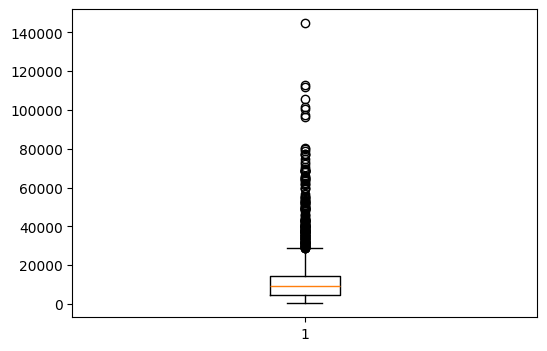

In [ ]:
df1 = df1_fix.copy()

plt.figure(figsize=(6,4))
plt.boxplot(df1['avg_bill'])
plt.show()

In [ ]:
# 이상치 제거

def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    UF = Q3 + 1.5 * IQR
    LF = Q1 - 1.5 * IQR if Q1 - 1.5 * IQR > 0 else 0

    df = df[(df[column] > LF) & (df[column] < UF)]

    return df

# 이상치를 LF와 UF로 변경

def changeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    UF = Q3 + 1.5 * IQR
    LF = Q1 - 1.5 * IQR if Q1 - 1.5 * IQR > 0 else 0

    df.loc[(df[column] > UF), column] = UF
    df.loc[(df[column] < LF), column] = LF

    return df

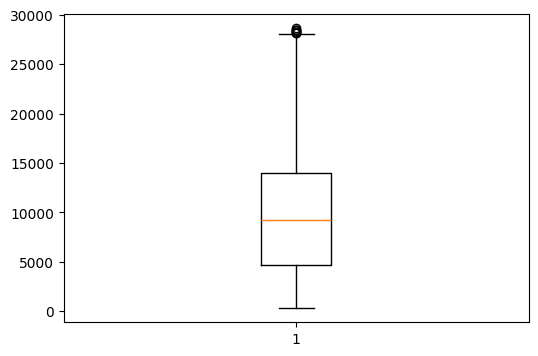

In [ ]:
df1 = df1_fix.copy()

df1 = removeOutliers(df1, 'avg_bill')

plt.figure(figsize=(6,4))
plt.boxplot(df1['avg_bill'])
plt.show()

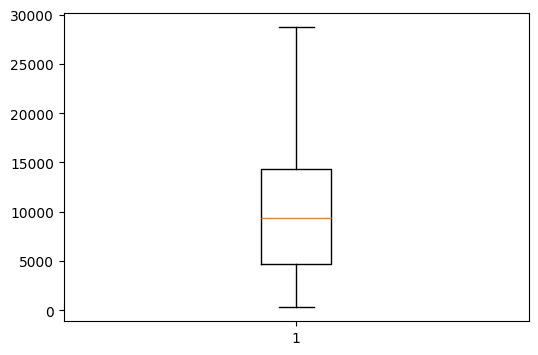

In [ ]:
df1 = df1_fix.copy()

df1 = changeOutliers(df1, 'avg_bill')

plt.figure(figsize=(6,4))
plt.boxplot(df1['avg_bill'])
plt.show()

## 3-2. 데이터 전처리 (Feature Engineering)

### (1) Binning

연속형 데이터를 범위를 나누어 범주형 데이터로 만듦

In [ ]:
Q1 = df1['avg_bill'].quantile(0.25)
Q3 = df1['avg_bill'].quantile(0.75)
MAX = df1['avg_bill'].max()

In [ ]:
# 구간을 직접 설정해서 나눔

df1 = df1_fix.copy()

df1['bill_rating'] = pd.cut(df1['avg_bill'], bins = [0, Q1, Q3, MAX], labels = ['low', 'mid', 'high'])

print(df1['bill_rating'].value_counts(), '\n')
df1.head()

bill_rating
mid     4114
low     2057
high    1895
Name: count, dtype: int64 



,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,bill_rating
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y,low
1,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N,high
2,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N,high
3,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N,low
4,C,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N,low


In [ ]:
# 구간의 개수만 주면 알아서 나눔

df1 = df1_fix.copy()

df1['bill_rating'] = pd.qcut(df1['avg_bill'], 3, labels = ['low', 'mid', 'high'])

print(df1['bill_rating'].value_counts(), '\n')
df1.head()

bill_rating
low     2744
high    2743
mid     2741
Name: count, dtype: int64 



,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,bill_rating
0,C,F,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y,low
1,E,F,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N,high
2,F,F,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N,high
3,D,M,18.0,1,N,N,4700.0000,0.00000,4502.0000,N,low
4,C,F,78.0,1,N,N,1361.7999,1173.99990,0.0000,N,low


### (2) Scaling

- **Standardization** : 데이터를 평균이 0이고 분산이 1인 표준 정규 분포로 변환
- **Normalization** : 데이터의 값을 0과 1 사이로 정규화

In [ ]:
df1 = df1_fix.copy()

df1 = df1[['avg_bill', 'age']]

df1.describe()

,avg_bill,age
count,8228.000000,8228.000000
mean,10356.605452,47.879801
std,8394.568408,19.255090
min,299.900100,4.000000
25%,4725.601635,32.000000
50%,9396.623330,49.000000
75%,14322.583350,61.000000
max,144739.686600,104.000000


In [ ]:
# 공식을 이용해 직접 standardization

stand_df1 = (df1 - df1.mean()) / df1.std()

stand_df1.describe()

,avg_bill,age
count,8.228000e+03,8.228000e+03
mean,-8.074349e-17,-1.133431e-17
std,1.000000e+00,1.000000e+00
min,-1.198001e+00,-2.278868e+00
25%,-6.707913e-01,-8.247066e-01
50%,-1.143575e-01,5.817679e-02
75%,4.724457e-01,6.813886e-01
max,1.600834e+01,2.914564e+00


In [ ]:
# MinMaxScaler를 이용해서 normalization

df1 = df1_fix.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normaliz_df1 = df1[['avg_bill', 'age']]

normaliz_df1[:] = scaler.fit_transform(normaliz_df1[:])

normaliz_df1.describe()

,avg_bill,age
count,8228.000000,8228.000000
mean,0.069626,0.438798
std,0.058118,0.192551
min,0.000000,0.000000
25%,0.030640,0.280000
50%,0.062979,0.450000
75%,0.097083,0.570000
max,1.000000,1.000000


### (3) Label Encoding

In [ ]:
# replace 함수를 이용해 직접 인코딩

df1 = df1_fix.copy()

df1['sex'].replace({'F':0, 'M':1}, inplace=True)

df1.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,0,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,0,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,0,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,1,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,0,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


In [ ]:
# LabelEncoder 클래스를 통해 자동으로 인코딩

df1 = df1_fix.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['sex'] = le.fit_transform(df1['sex'])

df1.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination
0,C,0,28.0,0,N,N,2640.0000,792.00000,1584.0000,Y
1,E,0,24.0,1,N,N,16840.0000,2526.00000,6983.0000,N
2,F,0,32.0,1,N,N,15544.7334,2331.71001,6750.4666,N
3,D,1,18.0,1,N,N,4700.0000,0.00000,4502.0000,N
4,C,0,78.0,1,N,N,1361.7999,1173.99990,0.0000,N


### (4) One-Hot Encoding

In [ ]:
# 각 샘플을 class를 기준으로 원 핫 인코딩

df1 = df1_fix.copy()
df1 = df1[['class', 'sex', 'age']]

df1.head()

,class,sex,age
0,C,F,28.0
1,E,F,24.0
2,F,F,32.0
3,D,M,18.0
4,C,F,78.0


In [ ]:
# 각 샘플을 class와 sex를 기준으로 원 핫 인코딩

df1 = df1_fix.copy()
df1 = df1[['class', 'sex', 'age']]

encoded_df1 = pd.get_dummies(data=df1, columns=['class'])
encoded_df1 = pd.get_dummies(data=encoded_df1, columns=['sex'])

encoded_df1.head()

,age,class_C,class_D,class_E,class_F,class_G,class_H,sex_F,sex_M
0,28.0,True,False,False,False,False,False,True,False
1,24.0,False,False,True,False,False,False,True,False
2,32.0,False,False,False,True,False,False,True,False
3,18.0,False,True,False,False,False,False,False,True
4,78.0,True,False,False,False,False,False,True,False


In [ ]:
# bool값인 column들을 찾음
boolean_cols = encoded_df1.select_dtypes(include=['bool']).columns
print(boolean_cols)

# bool값을 정수형으로 변환
encoded_df1[boolean_cols] = encoded_df1[boolean_cols].astype(int)

encoded_df1.head()

Index(['class_C', 'class_D', 'class_E', 'class_F', 'class_G', 'class_H',
       'sex_F', 'sex_M'],
      dtype='object')


,age,class_C,class_D,class_E,class_F,class_G,class_H,sex_F,sex_M
0,28.0,1,0,0,0,0,0,1,0
1,24.0,0,0,1,0,0,0,1,0
2,32.0,0,0,0,1,0,0,1,0
3,18.0,0,1,0,0,0,0,0,1
4,78.0,1,0,0,0,0,0,1,0


In [ ]:
# 만약 age를 예측하는 모델이면

X = encoded_df1.drop('age', axis=1)
y = encoded_df1['age']

display(X.head())
display(y.head())

,class_C,class_D,class_E,class_F,class_G,class_H,sex_F,sex_M
0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0


,age
0,28.0
1,24.0
2,32.0
3,18.0
4,78.0


### (5) PCA

In [ ]:
iris = sns.load_dataset('iris')

iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
# PCA를 위해 숫자형 데이터만 저장
iris0 = iris.iloc[:, :-1]

iris0.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
from sklearn.decomposition import PCA

# 주성분 2개 추출
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(iris0)

# 각 샘플의 주성분1과 주성분2에서의 좌표 값
pca_comp[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [ ]:
df_pca = pd.DataFrame(data=pca_comp, columns=['PCA1', 'PCA2'])
df_pca['target'] = iris.species

In [ ]:
# setosa의 주성분1과 주성분2에서의 좌표값
df_pca.head()

,PCA1,PCA2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


In [ ]:
# virginica의 주성분1과 주성분2에서의 좌표값
df_pca.tail()

,PCA1,PCA2,target
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica
149,1.390189,-0.282661,virginica


In [ ]:
# 각 주성분이 전체 데이터 분산(정보) 중 몇 %를 설명하는지 비율로 반환
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 4-1. 데이터 시각화 (Matplotlib)

### (1) Line Plot

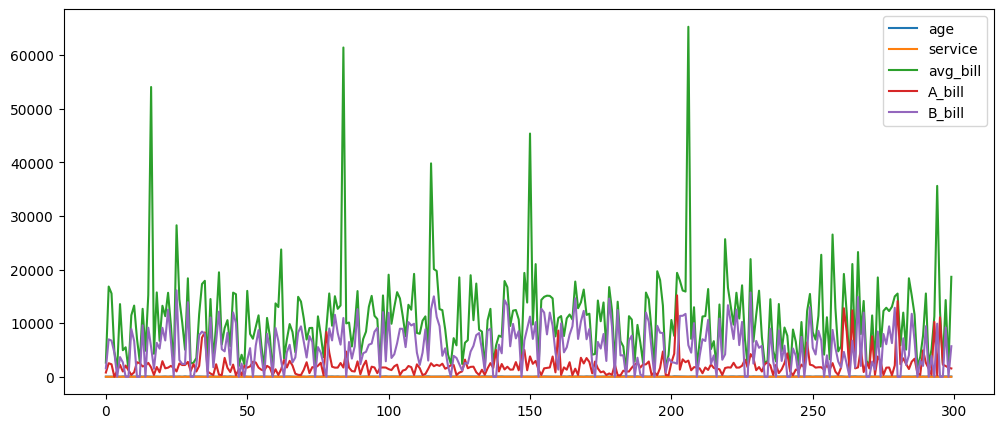

In [ ]:
# 여러 개의 column에 대해서 시각화할 때는 plt.plot(df3)는 안됨
df3.plot(figsize=(12,5))
plt.show()

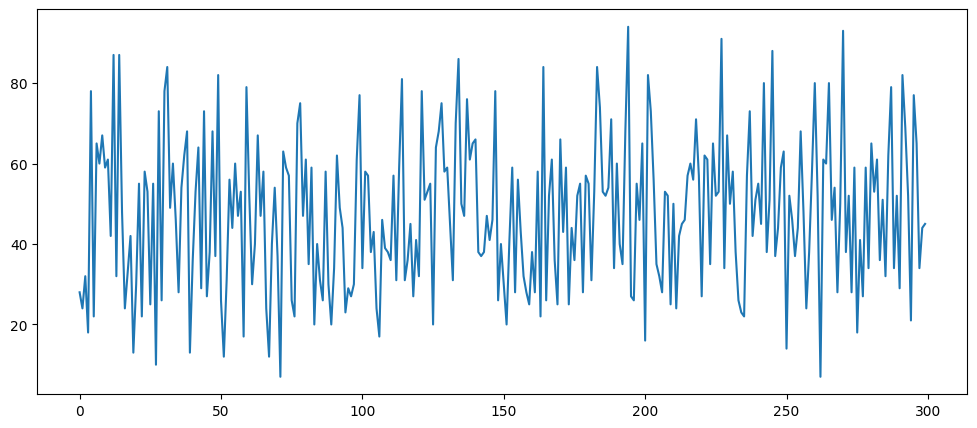

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df3['age'])
plt.show()

### (2) Scatter Plot

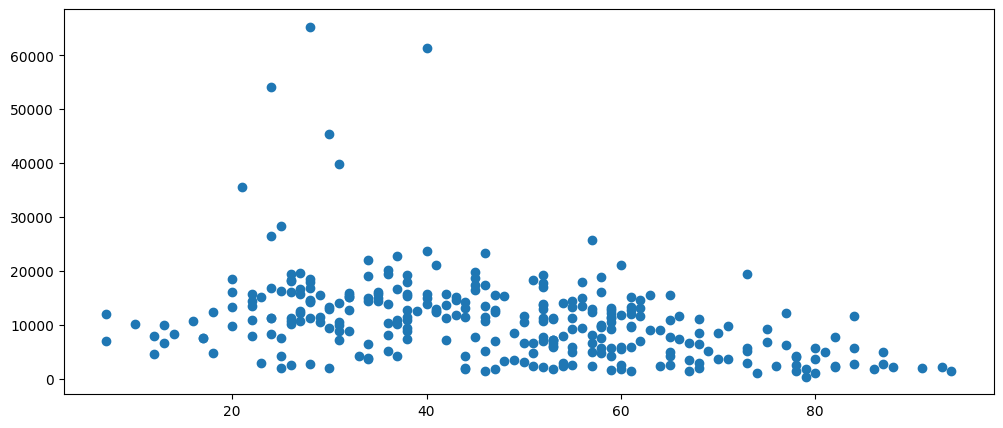

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x=df3['age'], y =df3['avg_bill'])
plt.show()

### (3) Histogram

### (4) Box Plot

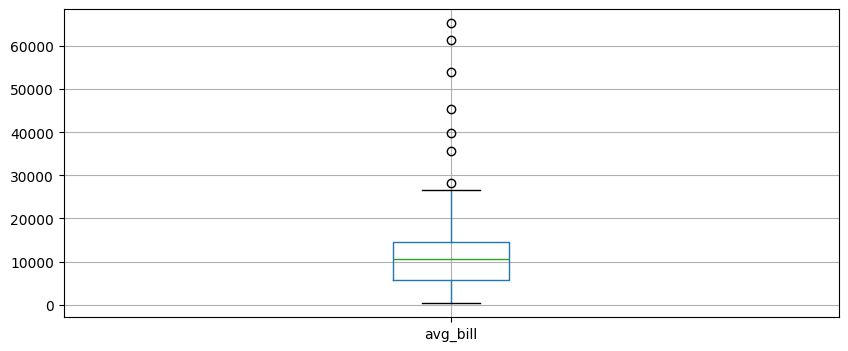

In [ ]:
plt.figure(figsize=(10,4))
df3.boxplot('avg_bill')
plt.show()

### (5) Bar Plot

In [ ]:
df = pd.pivot_table(df3, index=['service'], values=['A_bill', 'B_bill'])
df

,A_bill,B_bill
service,,
0,2880.144077,2974.792472
1,1882.602435,5732.896340
2,2687.804951,5860.821119
3,1779.331740,8548.636640
4,424.500000,9369.400000
6,1448.100000,4002.000000
7,4507.066600,9010.133400


<Axes: xlabel='service'>

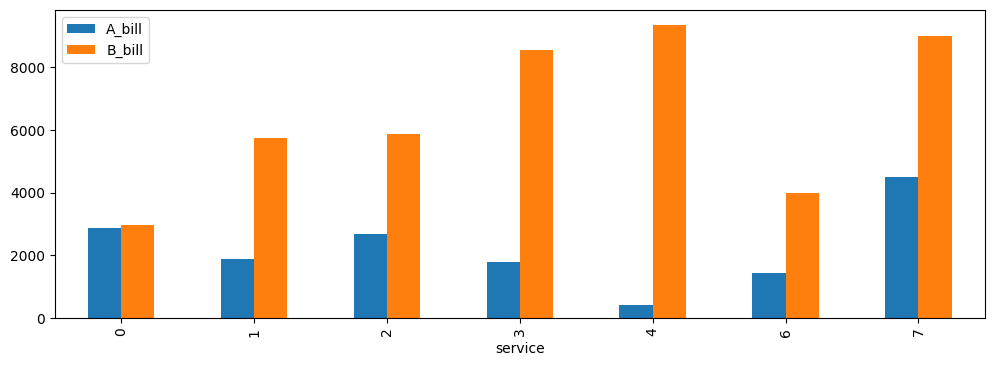

In [ ]:
df[['A_bill', 'B_bill']].plot(kind='bar', figsize=(12,4))

<Axes: xlabel='service'>

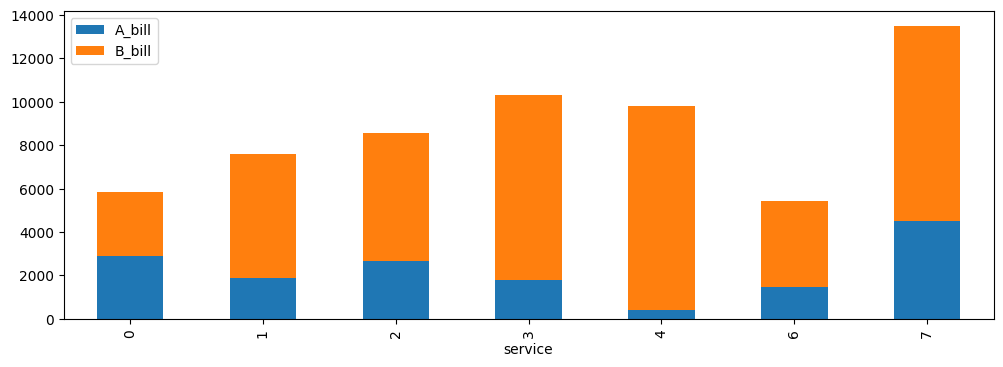

In [ ]:
# stacked 인자를 True로 하여 누적 막대 그래프 생성 가능
df[['A_bill', 'B_bill']].plot(kind='bar', stacked=True, figsize=(12,4))

### Marker

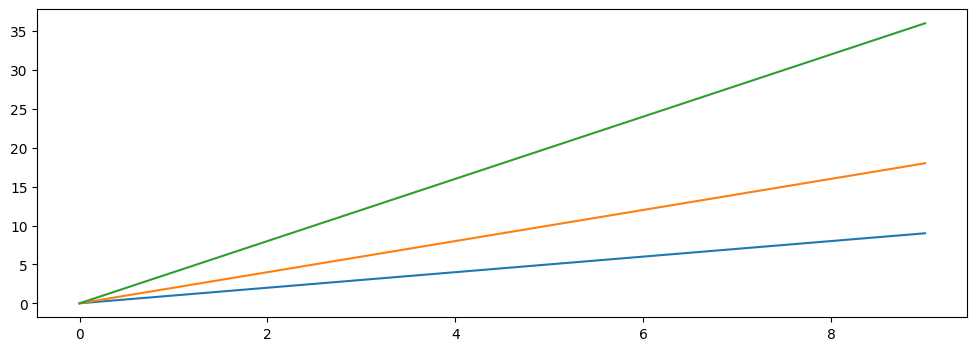

In [ ]:
x = list(range(0,10))
y1 = list(range(0,10))
y2 = list(range(0,20,2))
y3 = list(range(0,40,4))

plt.figure(figsize=(12,4))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

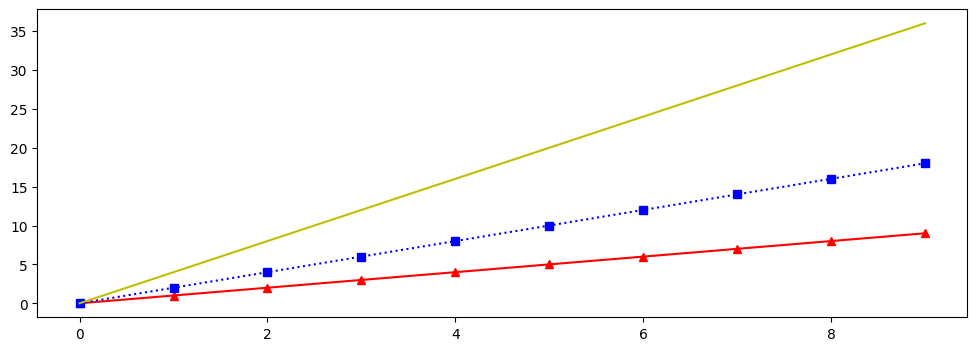

In [ ]:
# color : b, g, r, y
# marker : ^, v, o, s, .
# line style : -, --, : , -.

plt.figure(figsize=(12,4))
plt.plot(x, y1, 'r^-')
plt.plot(x, y2, 'bs:')
plt.plot(x, y3, 'y')
plt.show()

### Subplot

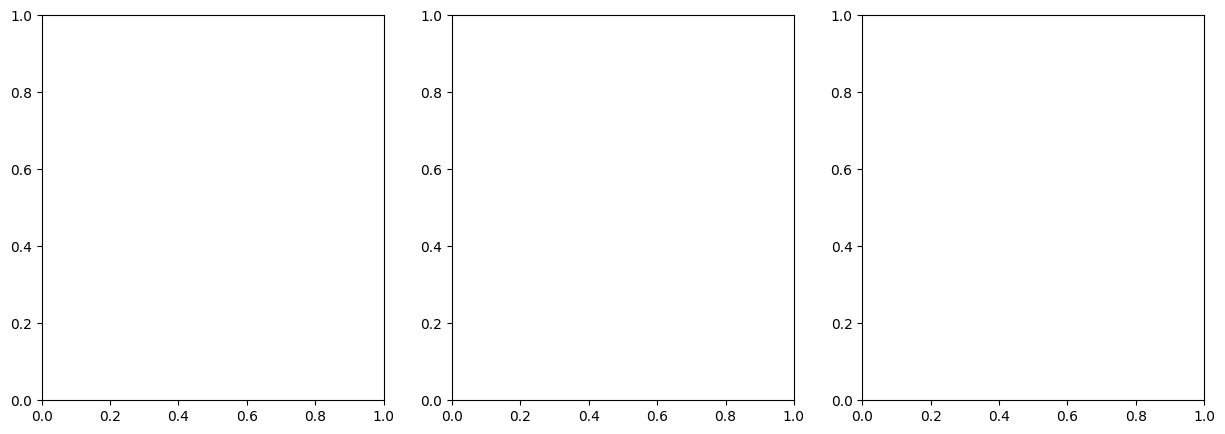

In [ ]:
plt.figure(figsize=(15,5))

# 1행 3열의 배치
plt.subplot(131)    # 그 중 첫번째 영역
plt.subplot(132)    # 그 중 두번째 영역
plt.subplot(133)    # 그 중 세번째 영역

plt.show()

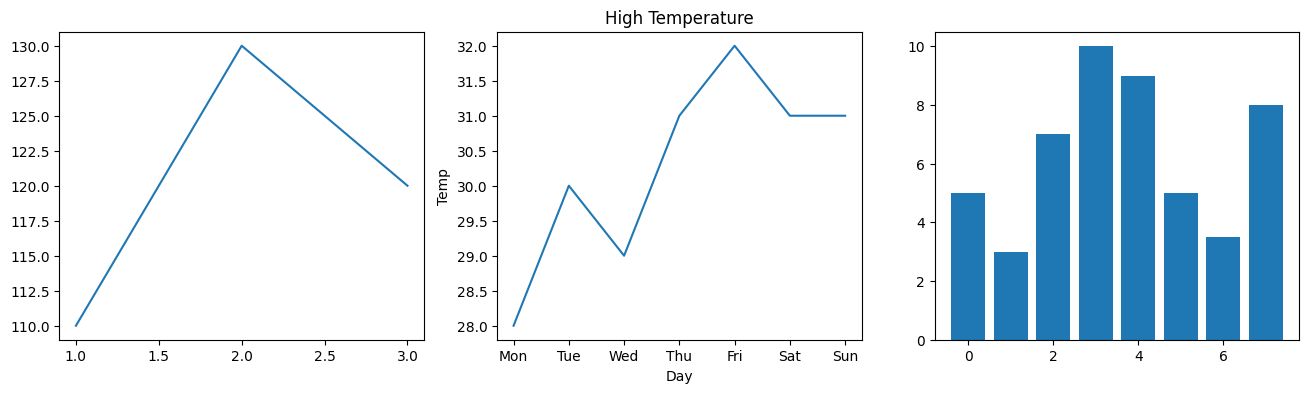

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(131)
plt.plot([1,2,3], [110,130,120])

plt.subplot(132)
plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], [28,30,29,31,32,31,31])
plt.xlabel('Day')
plt.ylabel('Temp')
plt.title('High Temperature')

plt.subplot(133)
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
plt.bar(x, height=y)

plt.show()

## 4-2. 데이터 시각화 (Seaborn)

### (1) Scatter Plot

<Axes: xlabel='age', ylabel='avg_bill'>

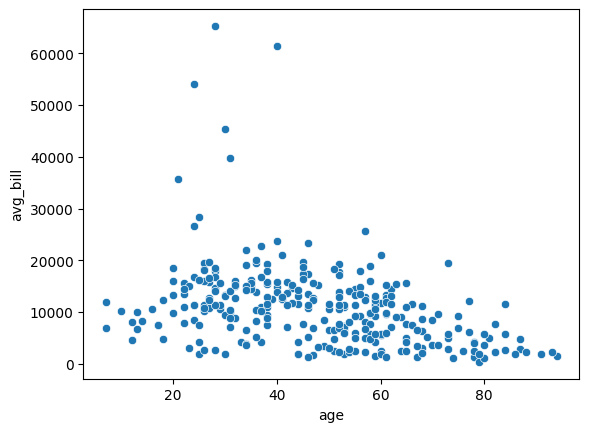

In [ ]:
sns.scatterplot(data=df3, x='age', y='avg_bill')

<Axes: xlabel='age', ylabel='avg_bill'>

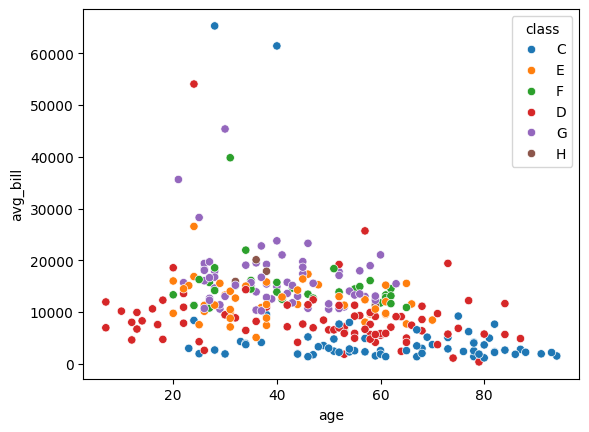

In [ ]:
sns.scatterplot(data=df3, x='age', y='avg_bill', hue='class')

### (2) LM Plot

산점도에 회귀선을 그려주어 추세를 확인할 수 있음

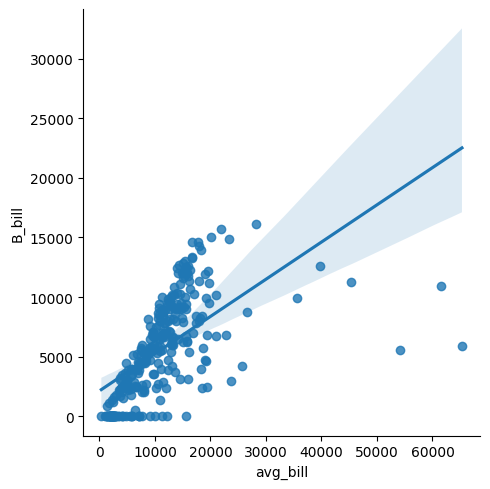

In [ ]:
sns.lmplot(data=df3, x='avg_bill', y='B_bill')

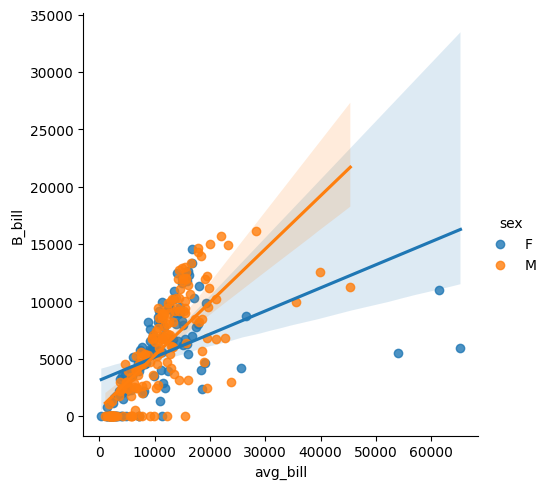

In [ ]:
sns.lmplot(data=df3, x='avg_bill', y='B_bill', hue='sex')

### (3) Bar Plot

<Axes: xlabel='class', ylabel='age'>

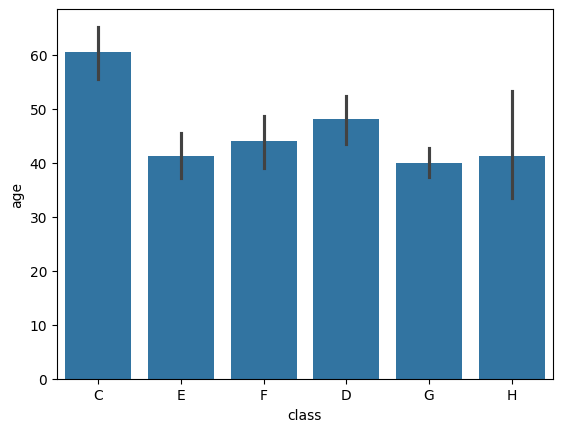

In [ ]:
sns.barplot(data=df3, x='class', y='age')

<Axes: xlabel='class', ylabel='age'>

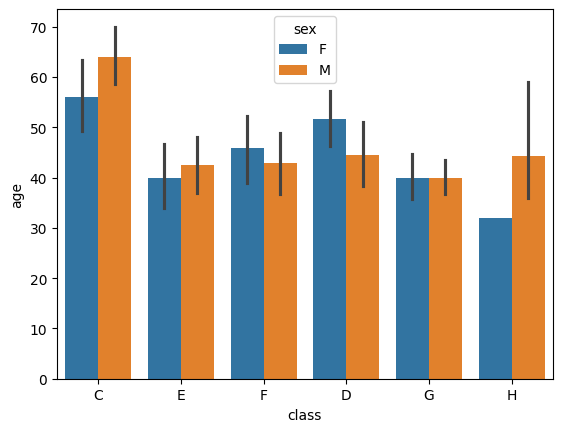

In [ ]:
sns.barplot(data=df3, x='class', y='age', hue='sex')

### (4) Count Plot

항목 별 개수를 확인할 때 사용

<Axes: xlabel='class', ylabel='count'>

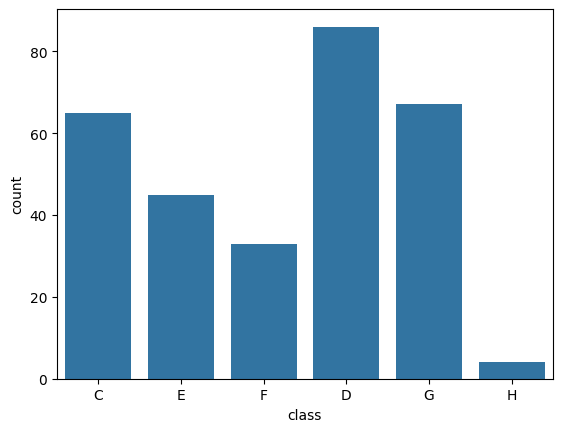

In [ ]:
sns.countplot(data=df3, x='class')

<Axes: xlabel='class', ylabel='count'>

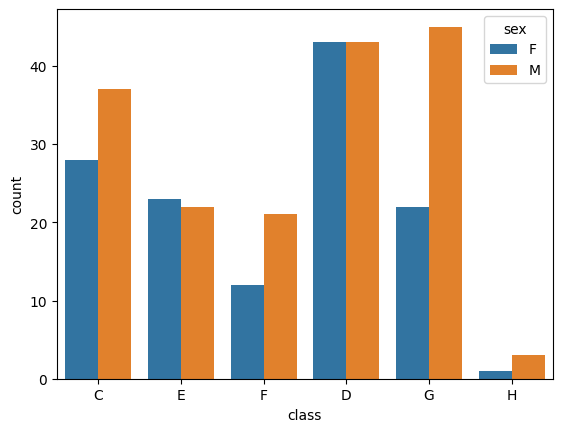

In [ ]:
sns.countplot(data=df3, x='class', hue='sex')

<Axes: xlabel='count', ylabel='class'>

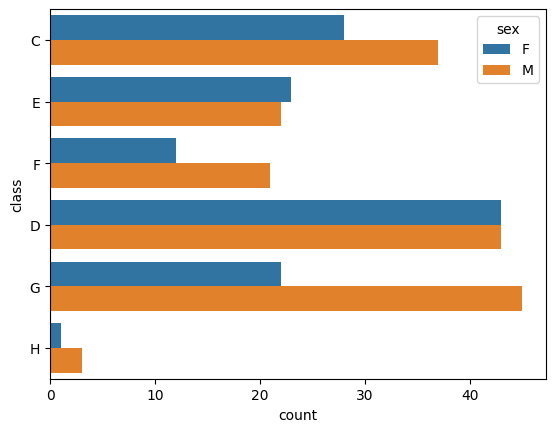

In [ ]:
# 인자로 x가 아니라 y를 주면 가로 막대로 출력됨
sns.countplot(data=df3, y='class', hue='sex')

### (5) Histogram

<Axes: xlabel='age', ylabel='Count'>

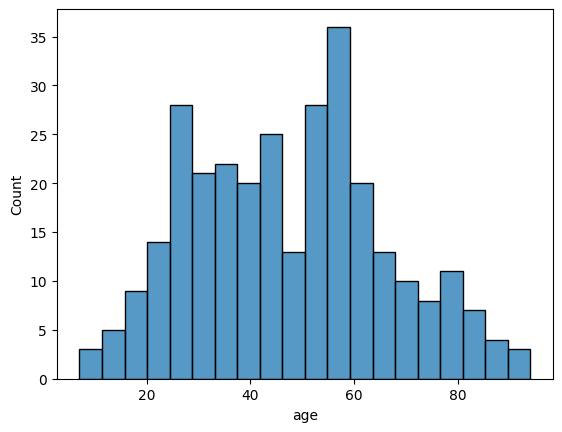

In [ ]:
sns.histplot(data=df3, x='age', bins=20)

<Axes: xlabel='age', ylabel='Count'>

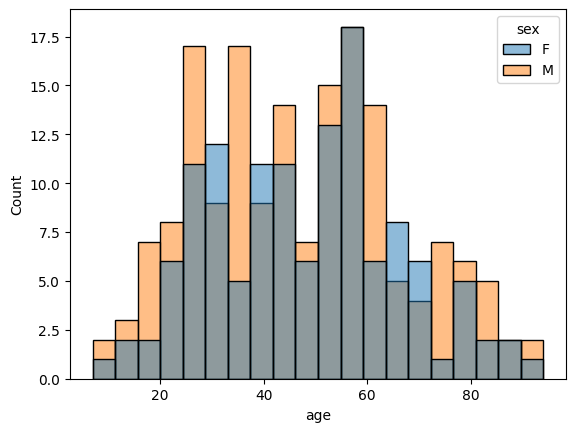

In [ ]:
sns.histplot(data=df3, x='age', bins=20, hue='sex')

### (6) Joint Plot

산점도와 히스토그램을 한 번에 보여줌 → 데이터의 분포와 상관관계를 한번에 볼 수 있음

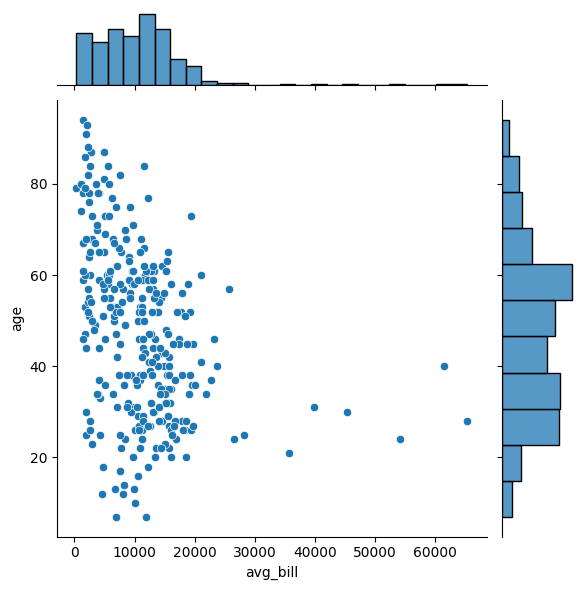

In [ ]:
sns.jointplot(data=df3, x='avg_bill', y='age')

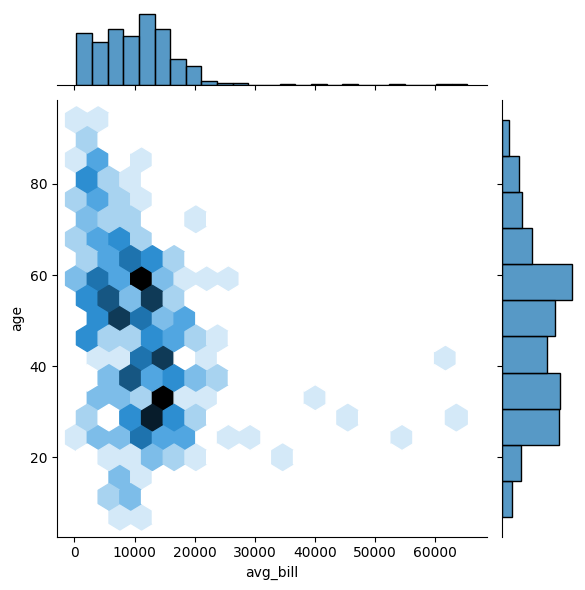

In [ ]:
sns.jointplot(data=df3, x='avg_bill', y='age', kind='hex')

### (7) Heat Map

연속성 데이터의 상관관계 확인 가능 (범주형 데이터는 불가능)

In [ ]:
df3 = df3_fix.copy()

df3 = df3.select_dtypes('number')
df3.head()

,age,service,avg_bill,A_bill,B_bill
0,28.0,0,2640.0000,792.00000,1584.0000
1,24.0,1,16840.0000,2526.00000,6983.0000
2,32.0,1,15544.7334,2331.71001,6750.4666
3,18.0,1,4700.0000,0.00000,4502.0000
4,78.0,1,1361.7999,1173.99990,0.0000


In [ ]:
# DataFrame에서 각 feature들 간의 상관관계를 계산

corr = df3.corr()

corr

,age,service,avg_bill,A_bill,B_bill
age,1.000000,0.087915,-0.371821,0.048136,-0.417445
service,0.087915,1.000000,0.164381,0.000206,0.172290
avg_bill,-0.371821,0.164381,1.000000,0.164772,0.610946
A_bill,0.048136,0.000206,0.164772,1.000000,-0.114134
B_bill,-0.417445,0.172290,0.610946,-0.114134,1.000000


<Axes: >

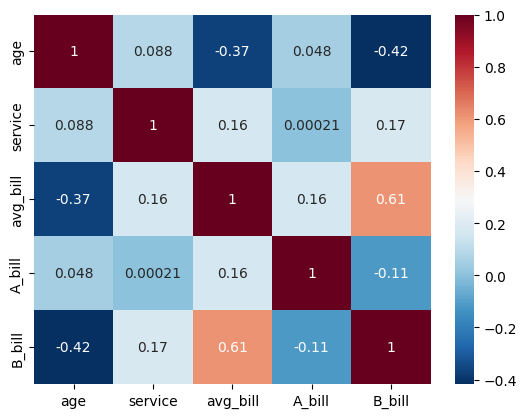

In [ ]:
# annot 인자는 셀 안에 숫자 표시의 유무 / cmap 인자는 색상 팔레트를 지정

sns.heatmap(corr, annot=True, cmap='RdBu_r')

### (8) Box Plot

<Axes: xlabel='class', ylabel='avg_bill'>

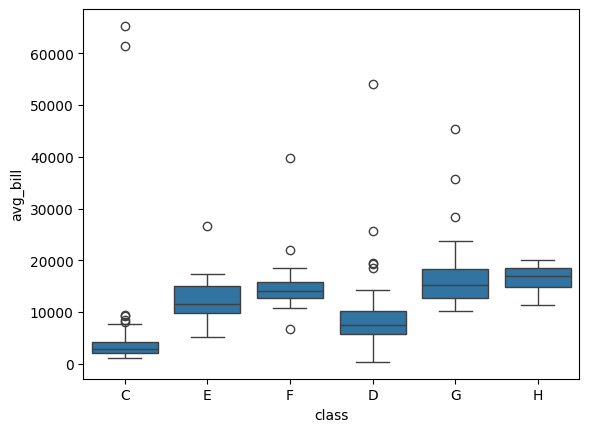

In [ ]:
sns.boxplot(data=df3, x='class', y='avg_bill')

### (9) Violin Plot

Box Plot과 모양이 비슷하지만 밀집도도 함께 볼 수 있음

<Axes: xlabel='class', ylabel='avg_bill'>

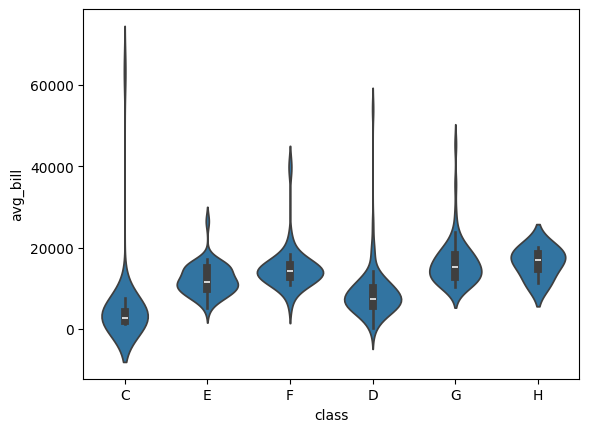

In [ ]:
sns.violinplot(data=df3, x='class', y='avg_bill')

### (10) Subplot

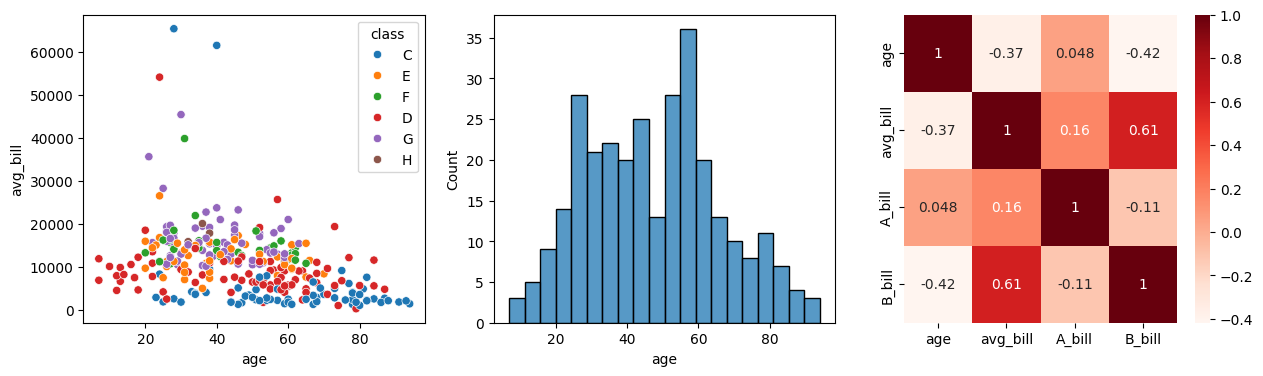

In [ ]:
df3 = df3_fix.copy()

plt.figure(figsize=(15,4))

plt.subplot(131)
sns.scatterplot(data=df3, x='age', y='avg_bill', hue='class')

plt.subplot(132)
sns.histplot(data=df3, x='age', bins=20)

plt.subplot(133)
sns.heatmap(df3[['age', 'avg_bill', 'A_bill', 'B_bill']].corr(), annot=True, cmap='Reds')

plt.show()

## 5-1. 머신러닝 (회귀 모델)

In [ ]:
tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,1,2
1,10.34,1.66,1,0,2,1,3
2,21.01,3.50,1,0,2,1,3
3,23.68,3.31,1,0,2,1,2
4,24.59,3.61,0,0,2,1,4


### (1) Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

X = tips2.drop('tip', axis=1)
y = tips2['tip']

# train set과 test set의 비율을 8:2로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DataFrame의 Series 객체를 Numpy 배열로 변환
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

-0.12347881560766805

In [ ]:
# 하이퍼파라미터: 트리 깊이
dtr = DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.15141070733011341

### (2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.26996961367744055

In [ ]:
# 하이퍼파라미터: 트리 개수 / 트리 깊이
rfr = RandomForestRegressor(n_estimators=50, max_depth=6)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.26126684544858814

In [ ]:
# 예측 라벨과 진짜 라벨 비교
pred = rfr.predict([X_test[0]])
print(f'label: {y_test[0]}, pred: {pred.item()}')

label: 3.18, pred: 2.941446465557992


### (3) KNN

In [ ]:
from sklearn.model_selection import train_test_split

X = tips2.drop('total_bill', axis=1)
y = tips2['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 하이퍼파라미터: 이웃 개수
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.39769759964815454

In [ ]:
# 새로운 데이터 예측 (실제 데이터는 6차원이므로 simul data도 6차원으로 생성)
simulation_data = [3.23, 1. , 0. , 2. , 1. , 2. ]
knn.predict([simulation_data])

array([18.55333333])

## 5-2. 머신러닝 (분류 모델)

### (1) Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

X = tips2.drop('smoker', axis=1)
y = tips2['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7142857142857143

### (2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.673469387755102

In [ ]:
pred = rfc.predict([X_test[0]])
print(f'label: {y_test[0]}, pred: {pred.item()}')

label: 0, pred: 0


### (3) KNN

In [ ]:
from sklearn.model_selection import train_test_split

X = tips2.drop('day', axis=1)
y = tips2['day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터: 이웃 개수
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.42857142857142855

In [ ]:
simulation_data = [3.23, 1. , 0. , 2. , 1. , 2. ]
knn.predict([simulation_data])

array([0])

### (4) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
scaler = MinMaxScaler()

In [ ]:
df = df1_fix.copy()

df.replace({'Y':1, 'N':0}, inplace=True)
df['npay'] = le.fit_transform(df['npay'])
df = pd.get_dummies(data=df, columns=['class', 'sex', 'stop'], drop_first=True)

df.head()

,age,service,npay,avg_bill,A_bill,B_bill,termination,class_D,class_E,class_F,class_G,class_H,sex_M,stop_1
0,28.0,0,0,2640.0000,792.00000,1584.0000,1,False,False,False,False,False,False,False
1,24.0,1,0,16840.0000,2526.00000,6983.0000,0,False,True,False,False,False,False,False
2,32.0,1,0,15544.7334,2331.71001,6750.4666,0,False,False,True,False,False,False,False
3,18.0,1,0,4700.0000,0.00000,4502.0000,0,True,False,False,False,False,True,False
4,78.0,1,0,1361.7999,1173.99990,0.0000,0,False,False,False,False,False,False,False


In [ ]:
X = df.drop('termination', axis=1)
y = df['termination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5759, 13), (2469, 13), (5759,), (2469,))

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.9194005670311867

In [ ]:
lg_pred = lg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, lg_pred))

print(accuracy_score(y_test, lg_pred))
print(precision_score(y_test, lg_pred))
print(recall_score(y_test, lg_pred))
print(f1_score(y_test, lg_pred))

[[2215    9]
 [ 190   55]]
0.9194005670311867
0.859375
0.22448979591836735
0.3559870550161812


In [ ]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2224
           1       0.86      0.22      0.36       245

    accuracy                           0.92      2469
   macro avg       0.89      0.61      0.66      2469
weighted avg       0.91      0.92      0.90      2469



## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=3, random_state=42)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.604293236127987

## 6. 딥러닝

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

### (1) 회귀 모델

In [ ]:
from sklearn.model_selection import train_test_split

X = tips2.drop('tip', axis=1)
y = tips2['tip']

# train set과 test set의 비율을 8:2로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DataFrame의 Series 객체를 Numpy 배열로 변환
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=(6,)))
# 이전 layer의 출력 크기를 자동으로 입력 크기로 사용함
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation=None))

model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2992 - mae: 0.8378 - val_loss: 0.7098 - val_mae: 0.6632
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0732 - mae: 0.7283 - val_loss: 0.7236 - val_mae: 0.6662
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1208 - mae: 0.7760 - val_loss: 0.7808 - val_mae: 0.6790
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2044 - mae: 0.7574 - val_loss: 0.7418 - val_mae: 0.6683
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6040 - mae: 0.8960 - val_loss: 0.7242 - val_mae: 0.6637
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3909 - mae: 0.8291 - val_loss: 0.7237 - val_mae: 0.6628
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2147 - mae: 0.7658 - val_loss: 0.7387 - val_mae: 0.6655
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0866 - mae: 0.7434 - val_loss: 0.7261 - val_mae: 0.6615
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0963 - mae:

In [ ]:
# EarlyStopping: 매 epoch 마다 val loss를 측정해서 3번 동안 더 이상 성능이 나아지지 않으면 조기 종료

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# ModelCheckpoint: 매 epoch 마다 val loss를 측정해서 이전보다 성능이 좋아지면 모델을 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9954 - mae: 0.6585
Epoch 1: val_loss improved from inf to 0.70599, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2444 - mae: 0.7844 - val_loss: 0.7060 - val_mae: 0.6548
Epoch 2/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 1.3381 - mae: 0.8785
Epoch 2: val_loss improved from 0.70599 to 0.70241, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1192 - mae: 0.7398 - val_loss: 0.7024 - val_mae: 0.6535
Epoch 3/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.7635 - mae: 1.1140
Epoch 3: val_loss improved from 0.70241 to 0.69925, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1950 - mae: 0.8011 - val_loss: 0.6993 - val_mae: 0.6520
Epoch 4/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6279 - mae: 0.5195
Epoch 4: val_loss did not improve from 0.69925
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2692 - mae: 0.8061 - val_loss: 0.7174 - val_mae: 0.6581
Epoch 5/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.5797 - mae: 0.6096
Epoch 5: val_loss did not improve from 0.69925
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0234 - mae: 0.7357 - val_loss: 0.7241 - val_mae: 0.6612
Epoch 6/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.2809 - mae: 0.4775
Epoch 6: val_loss did not improve from 0.69925
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9739 - mae: 0.7080 - val_loss: 0.7228 - val_mae: 0.6610
Epoch 6: early stopping


In [ ]:
pred = model.predict(X_test[0:2])
print(pred, y_test[0:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[2.9428458]
 [1.5781375]] [3.18 2.  ]


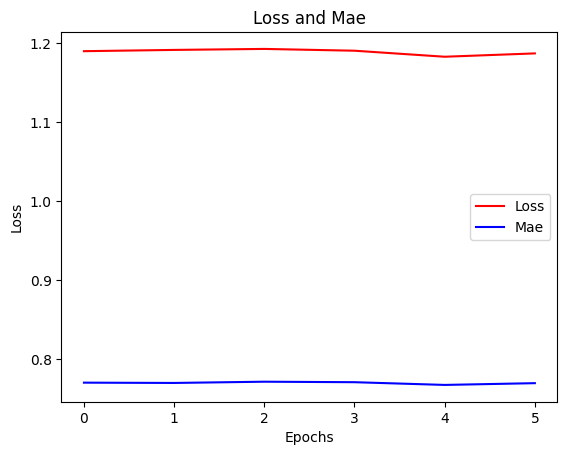

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['mae'], 'b')
plt.title('Loss and Mae')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Mae"])
plt.show()

### (2) 분류 모델

In [ ]:
from sklearn.model_selection import train_test_split

X = tips2.drop('day', axis=1)
y = tips2['day']

# train set과 test set의 비율을 8:2로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DataFrame의 Series 객체를 Numpy 배열로 변환
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [ ]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(6,)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.summary()

# 이진 분류는 binary_crossentropy 사용
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3545 - loss: 2.1711 - val_accuracy: 0.3469 - val_loss: 1.2884
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2793 - loss: 1.5498 - val_accuracy: 0.3878 - val_loss: 1.2223
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3643 - loss: 1.4646 - val_accuracy: 0.3061 - val_loss: 1.2061
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3655 - loss: 1.3092 - val_accuracy: 0.4490 - val_loss: 1.1855
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3335 - loss: 1.2799 - val_accuracy: 0.3673 - val_loss: 1.1807
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3730 - loss: 1.3307 - val_accuracy: 0.3469 - val_loss: 1.2023
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4373 - loss: 1.2381 - val_accuracy: 0.3878 - val_loss: 1.1921
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3057 - loss: 1.2693 - val_accuracy: 0.4286 - val_loss

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2500 - loss: 1.4543
Epoch 1: val_loss improved from inf to 1.07553, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5276 - loss: 1.1358 - val_accuracy: 0.5714 - val_loss: 1.0755
Epoch 2/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6250 - loss: 1.0482
Epoch 2: val_loss improved from 1.07553 to 1.06458, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5411 - loss: 1.1496 - val_accuracy: 0.5714 - val_loss: 1.0646
Epoch 3/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5000 - loss: 1.4824
Epoch 3: val_loss improved from 1.06458 to 1.04428, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5309 - loss: 1.1601 - val_accuracy: 0.5714 - val_loss: 1.0443
Epoch 4/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6250 - loss: 0.9871
Epoch 4: val_loss improved from 1.04428 to 1.03052, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 1.0496 - val_accuracy: 0.6122 - val_loss: 1.0305
Epoch 5/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3750 - loss: 1.2797
Epoch 5: val_loss did not improve from 1.03052
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5381 - loss: 1.1065 - val_accuracy: 0.6122 - val_loss: 1.0369
Epoch 6/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3750 - loss: 0.9890
Epoch 6: val_loss did not improve from 1.03052
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5180 - loss: 1.1036 - val_accuracy: 0.5714 - val_loss: 1.0312
Epoch 7/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6250 - loss: 0.9458
Epoch 7: val_loss improved from 1.03052 to 1.00680, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5500 - loss: 1.0773 - val_accuracy: 0.6327 - val_loss: 1.0068
Epoch 8/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 1.1900
Epoch 8: val_loss improved from 1.00680 to 0.99836, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5712 - loss: 1.0638 - val_accuracy: 0.6735 - val_loss: 0.9984
Epoch 9/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 1.0876
Epoch 9: val_loss improved from 0.99836 to 0.98937, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5964 - loss: 1.0584 - val_accuracy: 0.6735 - val_loss: 0.9894
Epoch 10/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7500 - loss: 0.9515
Epoch 10: val_loss improved from 0.98937 to 0.98160, saving model to best_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5898 - loss: 1.0682 - val_accuracy: 0.6939 - val_loss: 0.9816


In [ ]:
pred = model.predict(X_test[0:2])
print(pred, y_test[0:2])

np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.06548847 0.4302109  0.40382499 0.10047564]
 [0.13269311 0.3414826  0.39382985 0.13199444]] [1 2]


array([1, 2])

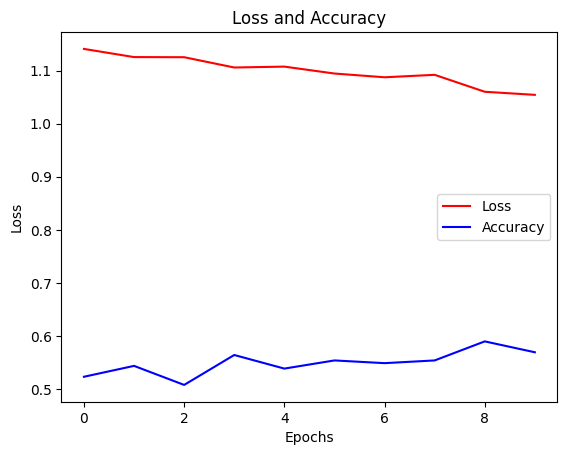

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss and Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Accuracy"])
plt.show()

In [ ]:
losses = pd.DataFrame(history.history)
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.523077,1.140981,0.571429,1.075529
1,0.543590,1.125589,0.571429,1.064582
2,0.507692,1.125352,0.571429,1.044280
3,0.564103,1.105953,0.612245,1.030518
4,0.538462,1.107630,0.612245,1.036920


<Axes: >

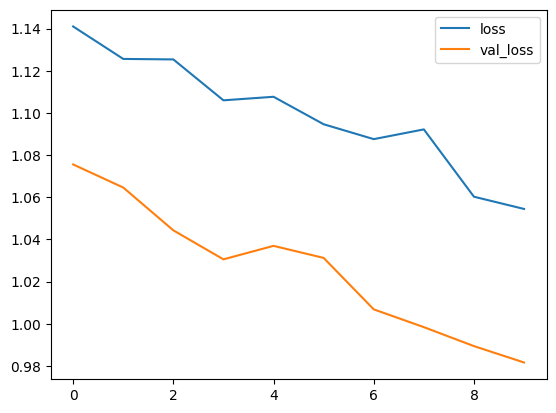

In [ ]:
losses[['loss', 'val_loss']].plot()